In [1]:
import os
import pandas as pd
%matplotlib inline
import nltk
from newsapi import NewsApiClient
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

[nltk_data] Downloading package punkt to /Users/michana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/michana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("stopwords")
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
type(api_key)

str

In [7]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_news["articles"][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Bitcoin whale moves $1.1 billion in bitcoins for an $80 fee',
 'description': "Bitcoin hasn't (yet) fulfilled its original promise of being widely-used electronic cash, but it still offers some features that would be hard to achieve within the traditional banking system. Namely, moving $1.1 billion from one address to another, in a sing…",
 'url': 'https://mashable.com/article/bitcoin-1-1-billion-transaction/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F01%252F15%252F38%252Fd26e834787934c56a33fdeb39faa0be8.84e34.jpg%252F1200x630.jpg?signature=IHj6xz7nTFxvmjn6XOvUiHKJCIM=',
 'publishedAt': '2020-01-15T09:10:59Z',
 'content': "Bitcoin hasn't (yet) fulfilled its original promise of being widely-used electronic cash, but it still offers some features that would be hard to achieve within the traditional banking system. Namely, moving $1.1 billion from one address to another, in a sing… [+1

In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Josh Constine',
 'title': 'The crypto rich find security in Anchorage',
 'description': 'Not the city, the $57 million-funded cryptocurrency custodian startup. When someone wants to keep tens or hundreds of millions of dollars in Bitcoin, Ethereum, or other coins safe, they put them in Anchorage’s vault. And now they can trade straight from custo…',
 'url': 'http://techcrunch.com/2020/01/15/anchorage-trading-from-custody/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/01/Anchorage-Trading-1.png?w=740',
 'publishedAt': '2020-01-15T11:57:30Z',
 'content': 'Not the city, the $57 million-funded cryptocurrency custodian startup. When someone wants to keep tens or hundreds of millions of dollars in Bitcoin, Ethereum, or other coins safe, they put them in Anchorage’s vault. And now they can trade straight from custo… [+3802 chars]'}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-01-15,Bitcoin hasn't (yet) fulfilled its original pr...,0.0088,0.074,0.073,0.853
1,2020-01-15,"Not the city, the $57 million-funded cryptocur...",0.5859,0.103,0.000,0.897
2,2020-01-07,Shutterstock\r\n<ul><li>Bitcoin bulls like to ...,0.6369,0.198,0.107,0.696
3,2020-01-06,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932
4,2020-01-21,Our robot colleague Satoshi Nakaboto writes ab...,0.9076,0.209,0.000,0.791


In [10]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-01-15,"Not the city, the $57 million-funded cryptocur...",0.5859,0.103,0.000,0.897
1,2020-01-11,Blockchain has the two most popular and compet...,0.6195,0.112,0.000,0.888
2,2020-01-09,"Virgil Griffith, the Ethereum developer arrest...",-0.7096,0.053,0.182,0.766
3,2020-01-23,Theres more to cryptocurrency and blockchain t...,0.4019,0.063,0.000,0.937
4,2020-01-02,"Like Bitcoin, Ethereum is a blockchain network...",-0.7096,0.080,0.183,0.737


In [11]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.431240,0.079050,0.014100,0.906900
std,0.283505,0.054307,0.030989,0.070562
min,-0.202300,0.000000,0.000000,0.696000
25%,0.430825,0.067000,0.000000,0.887000
50%,0.507000,0.069000,0.000000,0.931000
75%,0.553000,0.080000,0.000000,0.933000
max,0.907600,0.209000,0.107000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.050355,0.065500,0.077400,0.857250
std,0.536529,0.051129,0.079162,0.091728
min,-0.817600,0.000000,0.000000,0.694000
25%,-0.541375,0.031500,0.000000,0.799750
50%,0.000000,0.064000,0.052000,0.863000
75%,0.424900,0.103250,0.177500,0.906250
max,0.670500,0.189000,0.187000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean score.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
import nltk
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-01-15,Bitcoin hasn't (yet) fulfilled its original pr...,0.0088,0.074,0.073,0.853,"[Bitcoin, yet, fulfilled, original, promise, w..."
1,2020-01-15,"Not the city, the $57 million-funded cryptocur...",0.5859,0.103,0.000,0.897,"[city, 57, million-funded, cryptocurrency, cus..."
2,2020-01-07,Shutterstock\r\n<ul><li>Bitcoin bulls like to ...,0.6369,0.198,0.107,0.696,"[Shutterstock, ul, li, Bitcoin, bull, like, cl..."
3,2020-01-06,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932,"[robot, colleague, Satoshi, Nakaboto, writes, ..."
4,2020-01-21,Our robot colleague Satoshi Nakaboto writes ab...,0.9076,0.209,0.000,0.791,"[robot, colleague, Satoshi, Nakaboto, writes, ..."


In [16]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-01-15,"Not the city, the $57 million-funded cryptocur...",0.5859,0.103,0.000,0.897,"[city, 57, million-funded, cryptocurrency, cus..."
1,2020-01-11,Blockchain has the two most popular and compet...,0.6195,0.112,0.000,0.888,"[Blockchain, two, popular, competitive, platfo..."
2,2020-01-09,"Virgil Griffith, the Ethereum developer arrest...",-0.7096,0.053,0.182,0.766,"[Virgil, Griffith, Ethereum, developer, arrest..."
3,2020-01-23,Theres more to cryptocurrency and blockchain t...,0.4019,0.063,0.000,0.937,"[Theres, cryptocurrency, blockchain, Bitcoin, ..."
4,2020-01-02,"Like Bitcoin, Ethereum is a blockchain network...",-0.7096,0.080,0.183,0.737,"[Like, Bitcoin, Ethereum, blockchain, network,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Satoshi', 'Nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'Satoshi'), 13),
 (('Nakaboto', 'writes'), 13),
 (('writes', 'Bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'Welcome'), 13),
 (('Welcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'Bitcoin'), 13),
 (('Bitcoin', 'Today'), 13),
 (('Today', 'Satoshi'), 13),
 (('Nakaboto', 'tell'), 13),
 (('tell', 'whats'), 13),
 (('whats', 'going'), 13),
 (('going', 'Bitcoin'), 13),
 (('Bitcoin', 'past'), 13),
 (('past', '24'), 13)]

In [19]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Bitcoin', 'Ethereum'), 3),
 (('North', 'Korea'), 2),
 (('cryptocurrency', 'conference'), 2),
 (('cryptocurrency', 'blockchain'), 2),
 (('Bitcoin', 'mine'), 2),
 (('char', 'Dfinity'), 2),
 (('city', '57'), 1),
 (('57', 'million-funded'), 1),
 (('million-funded', 'cryptocurrency'), 1),
 (('cryptocurrency', 'custodian'), 1),
 (('custodian', 'startup'), 1),
 (('startup', 'someone'), 1),
 (('someone', 'want'), 1),
 (('want', 'keep'), 1),
 (('keep', 'ten'), 1),
 (('ten', 'hundred'), 1),
 (('hundred', 'million'), 1),
 (('million', 'dollar'), 1),
 (('dollar', 'Bitcoin'), 1),
 (('Ethereum', 'coin'), 1)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 43),
 ('Satoshi', 28),
 ('Nakaboto', 26),
 ('char', 19),
 ('another', 14),
 ('say', 14),
 ('day', 14),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13)]

In [22]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 14),
 ('Bitcoin', 9),
 ('blockchain', 8),
 ('Ethereum', 7),
 ('platform', 4),
 ('even', 4),
 ('startup', 3),
 ('coin', 3),
 ('’', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

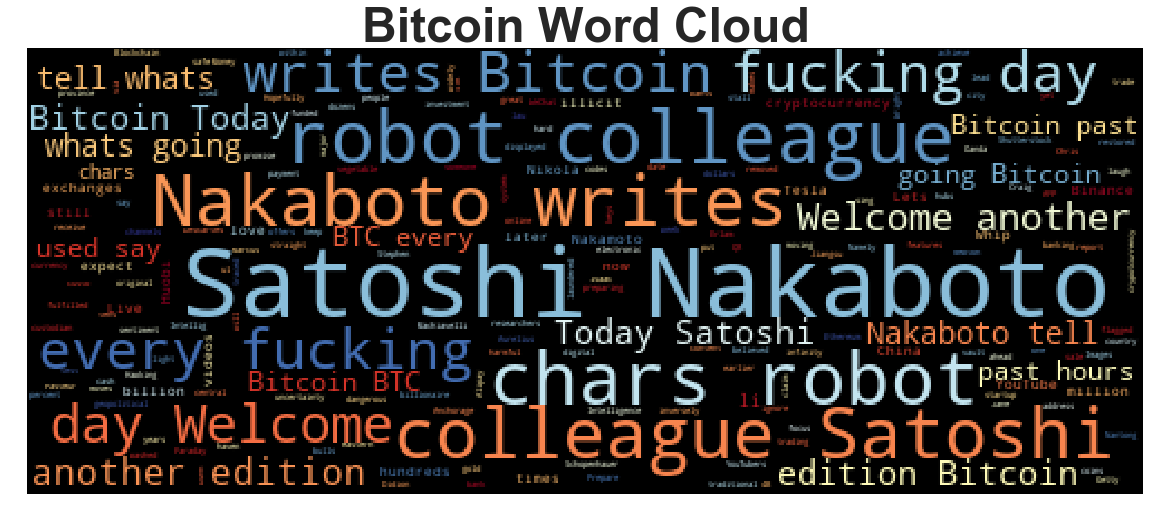

In [24]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(bitcoin_df.text.str.cat(), title="Bitcoin Word Cloud")

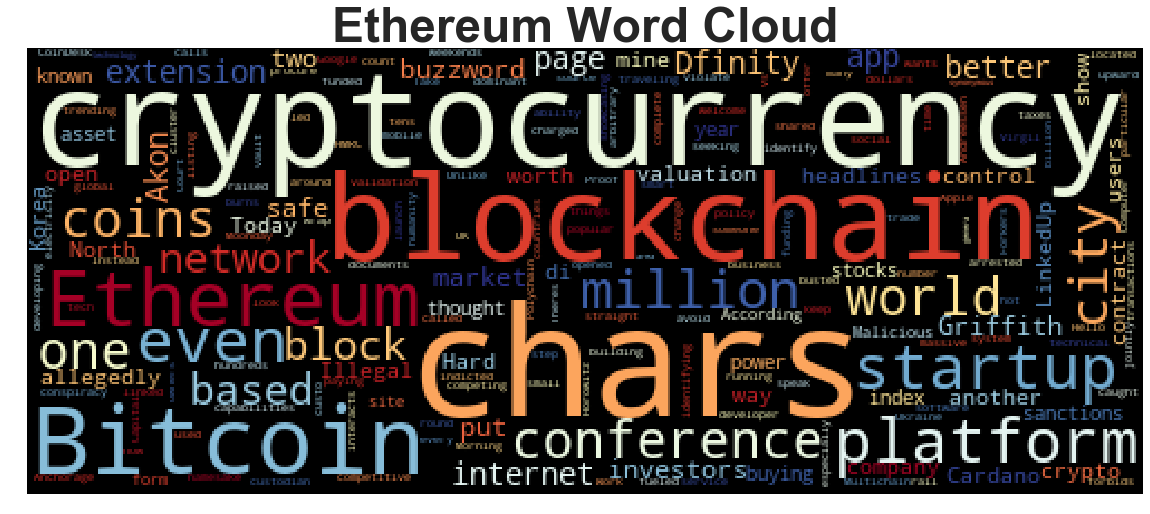

In [25]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
bitcoin_text = bitcoin_df.text.str.cat()
bitcoin_text

'Bitcoin hasn\'t (yet) fulfilled its original promise of being widely-used electronic cash, but it still offers some features that would be hard to achieve within the traditional banking system. Namely, moving $1.1 billion from one address to another, in a sing… [+1589 chars]Not the city, the $57 million-funded cryptocurrency custodian startup. When someone wants to keep tens or hundreds of millions of dollars in Bitcoin, Ethereum, or other coins safe, they put them in Anchorage’s vault. And now they can trade straight from custo… [+3802 chars]Shutterstock\r\n<ul><li>Bitcoin bulls like to claim that bitcoin is a great haven investment, like gold, in times of geopolitical uncertainty. </li><li>"These people ignore all the times that it moves inversely with sentiment," says Oanda\'s Craig Erlam.</li><li… [+2002 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been g

In [30]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)
# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
$1.1 billion MONEY
$57 million MONEY
tens or hundreds of millions of dollars MONEY
Bitcoin GPE
Anchorage GPE
+3802 chars]Shutterstock
< WORK_OF_ART
Bitcoin GPE
bitcoin GPE
Oanda PERSON
Craig ORG
+2002 chars]Our NORP
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Satoshi Nakamoto PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Pasteur PERSON
hundreds CARDINAL
dozens CARDINAL
the week DATE
Chris Dunn PERSON
YouTube CARDINAL
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Marcus Aurelius PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Isaac Newton P

---

## Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_df.text.str.cat()
ethereum_text

"Not the city, the $57 million-funded cryptocurrency custodian startup. When someone wants to keep tens or hundreds of millions of dollars in Bitcoin, Ethereum, or other coins safe, they put them in Anchorage’s vault. And now they can trade straight from custo… [+3802 chars]Blockchain has the two most popular and competitive platforms Multichain Vs. Ethereum. Blockchain has been a buzzword in the tech world. It also has more technical capabilities to offer in the global market. For business owners, investors, and even startups —… [+6386 chars]Virgil Griffith, the Ethereum developer arrested after allegedly traveling to North Korea to speak at a cryptocurrency conference, has been indicted.Court documents shared by CoinDesk show that Griffith is being charged with one count of conspiracy to violate… [+2544 chars]Theres more to cryptocurrency and blockchain than Bitcoin and Ethereum. There are many other competing coins and blockchain platforms, one of which is Cardano.\r\nCardano is an 

In [34]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)
# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

$57 million MONEY
tens or hundreds of millions of dollars MONEY
Bitcoin GPE
Anchorage GPE
two CARDINAL
Blockchain GPE
North Korea GPE
CoinDesk PERSON
Griffith PERSON
one CARDINAL
Bitcoin GPE
Ethereum GPE
one CARDINAL
Cardano GPE
Cardano PERSON
Bitcoin GPE
blockchain GPE
Today DATE
around $238.50 MONEY
UK GPE
100,000 MONEY
130,000 MONEY
HMRC ORG
Hard Forkers PERSON
1 CARDINAL
Bitcoin GPE
Ukraine GPE
Bitcoin GPE
LinkedUp ORG
Dfinity ORG
+2541 ORG
Google ORG
today DATE
$102 million MONEY
2018 DATE
$2 billion MONEY
Andreessen Horowitz PERSON
Polychain Capital ORG
New-York GPE
CabbageTech ORG
33 months DATE
June last year DATE
Patrick McDonnel PERSON
Jason Flack PERSON
224,352 MONEY
enigma PRODUCT
Bitcoin GPE
500 CARDINAL
bitcoin GPE
1 CARDINAL
the United Nations ORG
North Korea GPE
February DATE
Reuters rep ORG
Akon City GPE
Twitter PERSON
Senegal PERSON
Bitcoin BTC Golds FAC
72,000 MONEY
BTG ORG
blockchain GPE
between Thursday DATE
one CARDINAL
Machine Learning GPE
Blockchain GPE
decentra